## An approach of ANN to predict Iris Species

## Importing all necessary packages

In [1]:
from sklearn.datasets import load_iris

from keras.utils.np_utils import to_categorical
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense

from keras.metrics import Precision, Recall

import keras.backend as K

from keras.callbacks import ModelCheckpoint
from keras.models import load_model

from livelossplot import PlotLossesKeras

In [2]:
iris_df = load_iris()

In [3]:
features = iris_df.data
target = iris_df.target

## Split the data for training and validation

In [4]:
# splitting data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features,target, test_size=0.2,random_state=32)

In [5]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


## Converting the label to cataorical as its a multiclass classification

In [6]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

## Impliment ANN model over the train test split

In [7]:

K.clear_session()

initializer = tf.keras.initializers.HeNormal()

model = Sequential()

model.add(Dense(32, input_dim=4, activation='relu',kernel_initializer=initializer))# 1st Hidden Layer input_dim=4 -> 4 features

model.add(Dense(16, activation='relu'))  # 2nd Hidden Layer

model.add(Dense(3, activation='softmax')) # Output Layer should have softmax as activation as it is multiclass classification

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy',Precision(),Recall()]) # Cost/loss function should be categorical_crossentropy as it is multiclass classification

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                160       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 51        
Total params: 739
Trainable params: 739
Non-trainable params: 0
_________________________________________________________________


## Save the model

In [9]:
filename="irisModel.hdf5"
checkpoint=ModelCheckpoint(filepath=filename,monitor="val_accuracy",verbose=1,save_best_only=True,mode="max")

#if monitor is val_loss -> mode should be min (as the loss show be minimum).
#if monitor is val_accuracy -> mode should be max (as the accuracy show be maximum)
#can use any file path
#File extension can be hdf5,h5,sav..


## Fit the model and perfom quality check

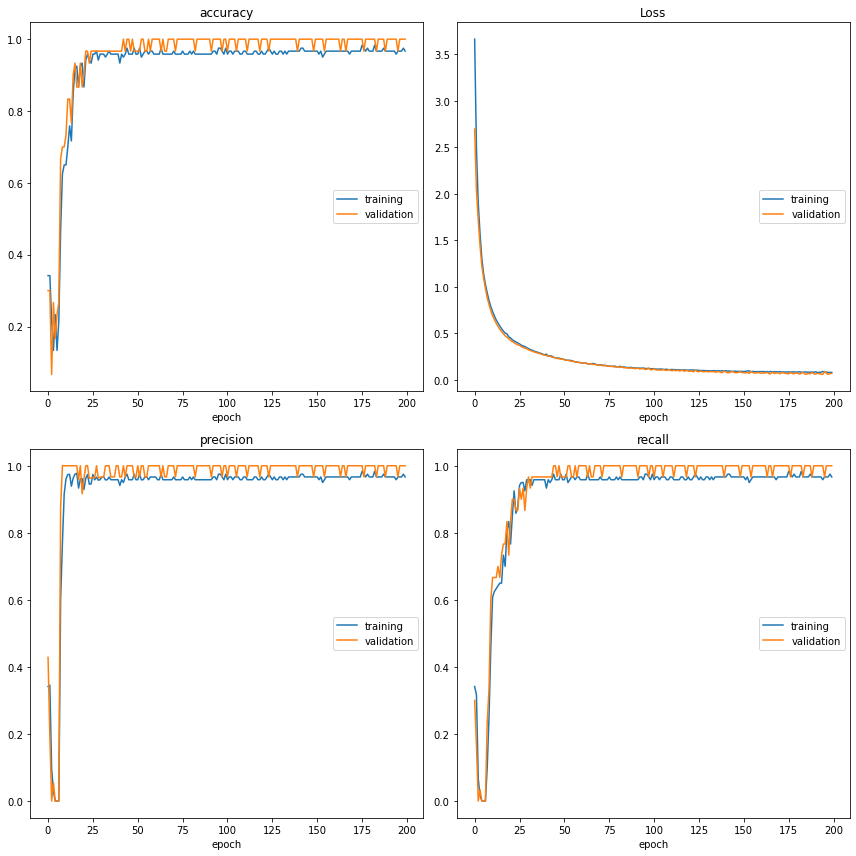

accuracy
	training         	 (min:    0.133, max:    0.983, cur:    0.967)
	validation       	 (min:    0.067, max:    1.000, cur:    1.000)
Loss
	training         	 (min:    0.078, max:    3.664, cur:    0.079)
	validation       	 (min:    0.057, max:    2.697, cur:    0.068)
precision
	training         	 (min:    0.000, max:    0.983, cur:    0.967)
	validation       	 (min:    0.000, max:    1.000, cur:    1.000)
recall
	training         	 (min:    0.000, max:    0.983, cur:    0.967)
	validation       	 (min:    0.000, max:    1.000, cur:    1.000)

Epoch 00200: val_accuracy did not improve from 1.00000
8/8 [==============================] - 1s 110ms/step - loss: 0.0791 - accuracy: 0.9667 - precision: 0.9667 - recall: 0.9667 - val_loss: 0.0681 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000


In [10]:
model.fit(X_train,y_train, batch_size=15, epochs=200, verbose=1, validation_data=(X_test, y_test),callbacks=[PlotLossesKeras(),checkpoint])

## Load the saved model

In [11]:
SavedModel=load_model("irisModel.hdf5")

OSError: SavedModel file does not exist at: irisModel.hdf5/{saved_model.pbtxt|saved_model.pb}

## Deploy the model

In [12]:
# Input
sepallength = float(input("Enter the sepal length (cm): "))
sepalwidth = float(input("Enter the sepal width (cm): "))
petallength = float(input("Enter the petal length (cm): "))
petalwidth = float(input("Enter the petal width (cm): "))

# Preprocess the Input
Feature_to_predict = [[sepallength,sepalwidth,petallength,petalwidth]]


#Predict
pred_label = model.predict(Feature_to_predict).argmax() #display the zero index or  whatever is max(voting)
if pred_label == 0:
    print("\nThe given input predict the label: \033[92m\033[1m{}\033[0m, which is of class: \033[92m\033[1mIris-Setosa\033[0m.".format(pred_label))
elif pred_label == 1:
    print("\nThe given input predict the label: \033[92m\033[1m{}\033[0m, which is of class: \033[92m\033[1mIris-Versicolour\033[0m.".format(pred_label))
elif pred_label == 2:
    print("\nThe given input predict the label: \033[92m\033[1m{}\033[0m, which is of class: \033[92m\033[1mIris-Virginica\033[0m.".format(pred_label))

Enter the sepal length (cm):  2
Enter the sepal width (cm):  3
Enter the petal length (cm):  4
Enter the petal width (cm):  5



The given input predict the label: 2, which is of class: Iris-Virginica.


## *** End ***